In [ ]:
!pip install torch torchvision Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
%%writefile model.py
import torch
from torch import nn

class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3),  # Output: 26x26
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3), # Output: 24x24
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3), # Output: 22x22
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 22 * 22, 10)       # Fully connected layer for 10 classes
        )

    def forward(self, x):
        return self.model(x)

Writing model.py


**NOTE:**
- model.py file is created and stored in the current working directory, which is the temporary runtime filesystem of the Colab virtual machine. By default, this is: /content/
- To confirm list the files using: !ls /content/
- Instead of creating a separate folder structure, we’ll define all the modules — such as `model.py`, `data_loader.py`, `train.py`, `evaluate.py`, and `utils.py` — directly within Google Colab using `%%writefile` in individual code cells to simulate separate Python files.

In [ ]:
!ls /content/

model.py  sample_data


In [ ]:
%%writefile data_loader.py
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

def get_data_loader(batch_size=32):
    train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
    return DataLoader(train_data, batch_size=batch_size, shuffle=True)


Writing data_loader.py


In [ ]:
%%writefile utils.py
import torch

def get_device():
    return "cuda" if torch.cuda.is_available() else "cpu"


Writing utils.py


In [ ]:
%%writefile train.py
import sys
from torch import save
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from model import ImageClassifier
from data_loader import get_data_loader
from utils import get_device
import matplotlib.pyplot as plt

def train_model(epochs=10, lr=1e-3, device="cpu"):
    loss_history = [] # List to track losses
    model = ImageClassifier().to(device)
    optimizer = Adam(model.parameters(), lr=lr)
    loss_fn = CrossEntropyLoss()
    data_loader = get_data_loader()

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            # Forward Pass
            outputs = model(images)
            loss = loss_fn(outputs, labels)

            # Backward Pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        epoch_loss = total_loss / len(data_loader)
        loss_history.append(epoch_loss) # Append epoch loss to history
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}")

    # torch.save(model.state_dict(), "model_state.pt")
    with open("model_state.pt", 'wb') as f:
        save(model.state_dict(), f)

    print("Training complete! Model saved as 'model_state.pt'.")

    # Plot loss curve
    plt.plot(range(1, epochs + 1), loss_history, marker='o')
    plt.title("Training Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.savefig("training_loss_curve.png")
    plt.show()

if __name__ == "__main__":
    # Device Setup
    device = get_device()
    train_model(epochs=5, device=device)  # Default: 5 epochs, but can also be 10 epochs

Writing train.py


In [ ]:
!python train.py


100% 9.91M/9.91M [00:00<00:00, 103MB/s]
100% 28.9k/28.9k [00:00<00:00, 17.9MB/s]
100% 1.65M/1.65M [00:00<00:00, 111MB/s]
100% 4.54k/4.54k [00:00<00:00, 10.6MB/s]
Epoch 1/5, Loss: 0.12433017870578915
Epoch 2/5, Loss: 0.04544283072237546
Epoch 3/5, Loss: 0.02886456973545525
Epoch 4/5, Loss: 0.020408585228114194
Epoch 5/5, Loss: 0.013985455428305432
Training complete! Model saved as 'model_state.pt'.
Figure(640x480)


In [ ]:
%%writefile evaluate.py
import sys
from PIL import Image, ImageOps
import torch
from torchvision.transforms import ToTensor
from model import ImageClassifier    # Assuming ImageClassifier is defined in train.py
import matplotlib.pyplot as plt

def predict_image(image_path, model_path="model_state.pt", device="cpu"):
    # Load Model
    model = ImageClassifier().to(device)
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()

    # Load and process the image
    with ImageOps.invert(Image.open(image_path).convert('L')) as img:
        img_tensor = ToTensor()(img).unsqueeze(0).to(device)

    # Perform prediction
    with torch.no_grad():
        output = model(img_tensor)
        predicted_label = torch.argmax(output).item()

    # Show image with prediction
    plt.imshow(img, cmap="gray")
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()
    print(f"Predicted Label: {predicted_label}")

Overwriting evaluate.py


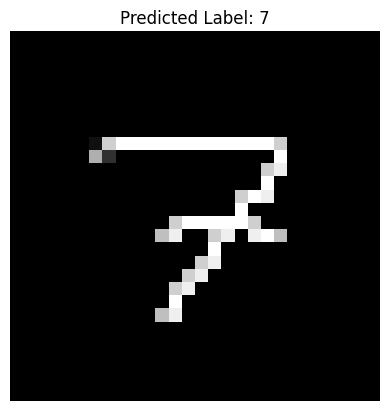

Predicted Label: 7


In [ ]:
from evaluate import predict_image
from utils import get_device

predict_image("digit1.png", device=get_device())
